<img src="../../images/arm_logo.png" width=500 alt="ARM Logo"></img>

# Py-ART Basics with Xradar
---

## Overview
   
Within this notebook, we will cover:

1. General overview of Py-ART and its functionality
1. Reading data using Py-ART
1. An overview of the `pyart.Radar` object
1. Create a Plot of our Radar Data


## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Basic features |
| [Weather Radar Basics](https://projectpythia.org/radar-cookbook/README.html) | Helpful | Background Information |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |
| [Xarray Basics](https://foundations.projectpythia.org/core/xarray.html) | Helpful | Multi-dimensional arrays |

- **Time to learn**: 45 minutes
---

## Imports

In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


import pyart
from pyart.testing import get_test_data
import xradar as xd

warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## An Overview of Py-ART

### History of the Py-ART

 * Development began to address the needs of ARM with the acquisition of a number of
   new scanning cloud and precipitation radar as part of the American Recovery Act.
 * The project has since expanded to work with a variety of weather radars and a wider user
   base including radar researchers and climate modelers.
 * The software has been released on GitHub as open source software under a BSD license.
   Runs on Linux, OS X. It also runs on Windows with more limited functionality.

### What can Py-ART Do?

[Py-ART](https://github.com/ARM-DOE/pyart) can be used for a variety of tasks from basic plotting to more complex
processing pipelines. Specific uses for Py-ART include:

 * [pyart.io](https://arm-doe.github.io/pyart/API/generated/pyart.io.html) Module for reading radar data in a variety of file formats.
 * [pyart.graph](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html) Module for creating plots and visualization of radar data.
 * [pyart.correct](https://arm-doe.github.io/pyart/API/generated/pyart.correct.html) Module for correcting radar moments while in antenna coordinates, such as:
    * Doppler unfolding/de-aliasing.
    * Attenuation correction.
    * Phase processing using a Linear Programming method.
 * [pyart.map](https://arm-doe.github.io/pyart/API/generated/pyart.map.html) Mapping data from one or multiple radars onto a Cartesian grid.
 * [pyart.retrieve](https://arm-doe.github.io/pyart/API/generated/pyart.retrieve.html) Performing retrievals.
 * [pyart.io.write_cfradial](https://arm-doe.github.io/pyart/API/generated/pyart.io.write_cfradial.html) Writing radial and Cartesian data to NetCDF files.

 ### Py-ART 2.0

 [Py-ART 2.0](https://arm-doe.github.io/pyart/userguide/pyart_2_0.html) offers the option to use [`xradar`](https://docs.openradarscience.org/projects/xradar/en/stable/) for reading weather radar data into the xarray data model. Py-ART 2.0 also supports [`cmweather`](https://cmweather.readthedocs.io/en/latest/), a new package dedicated to supporting color vision deficiency (CVD) friendly colormaps. Please check the [linked documentation](https://arm-doe.github.io/pyart/userguide/pyart_2_0.html) to view all the changes within Py-ART 2.0. 
 
 ---

## Reading in Data Using Py-ART and xradar

### Reading data in using `xradar.io.open_`

When reading in a radar file, we use the `xradar.io` module.

`xradar.io` can read a variety of different radar formats, such as Cf/Radial, ODIM_H5, etc.
The documentation on what formats can be read by xradar can be found here:

* [xradar readers Documentation](https://docs.openradarscience.org/projects/xradar/en/stable/importers.html)

Let's take a look at one of these readers:

In [2]:
?xd.io.open_cfradial1_datatree

Signature: xd.io.open_cfradial1_datatree(filename_or_obj, **kwargs)
Docstring:
Open CfRadial1 dataset as :py:class:`xarray.DataTree`.

Parameters
----------
filename_or_obj : str, Path, file-like or xarray.DataStore
    Strings and Path objects are interpreted as a path to a local or remote
    radar file

Keyword Arguments
-----------------
sweep : int, list of int, optional
    Sweep number(s) to extract, default to first sweep. If None, all sweeps are
    extracted into a list.
first_dim : str
    Can be ``time`` or ``auto`` first dimension. If set to ``auto``,
    first dimension will be either ``azimuth`` or ``elevation`` depending on
    type of sweep. Defaults to ``auto``.
reindex_angle : bool or dict
    Defaults to False, no reindexing. Given dict should contain the kwargs to
    reindex_angle. Only invoked if `decode_coord=True`.
fix_second_angle : bool
    If True, fixes erroneous second angle data. Defaults to ``False``.
optional : bool
    Import optional mandatory data an

Let's use a sample data file from `pyart` - which is [**cfradial** format](https://github.com/NCAR/CfRadial).

When we read this in, we get a [`xarray.DataTree` object](https://docs.xarray.dev/en/stable/generated/xarray.DataTree.html#xarray.DataTree) that bundles the different radar sweeps into one structure!

In [3]:
file = get_test_data("swx_20120520_0641.nc")
dt = xd.io.open_cfradial1_datatree(file)
dt

<xarray.DataTree>
Group: /
│   Dimensions:            (sweep: 22)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_group_name   (sweep) <U8 704B 'sweep_0' 'sweep_1' ... 'sweep_21'
│       sweep_fixed_angle  (sweep) float64 176B ...
│       latitude           float64 8B ...
│       altitude           float64 8B ...
│       longitude          float64 8B ...
│   Attributes:
│       instrument_name:     xsapr-sg
│       platform_is_mobile:  False
│       history:             created by user scollis on evs346820 at 13-Nov-2012,...
├── Group: /sweep_0
│       Dimensions:                            (azimuth: 400, range: 667)
│       Coordinates:
│           time                               (azimuth) datetime64[ns] 3kB 2011-05-2...
│         * range                              (range) float64 5kB 0.0 ... 3.996e+04
│         * azimuth                            (azimuth) float64 3kB 0.8281 ... 360.0
│           elevation                          (azimuth) float64 3kB ...
│           latitude                           float64 8B ...
│           longitude                          float64 8B ...
│           altitude                           float64 8B ...
│       Data variables: (12/16)
│           corrected_reflectivity_horizontal  (azimuth, range) float32 1MB ...
│           reflectivity_horizontal            (azimuth, range) float32 1MB ...
│           recalculated_diff_phase            (azimuth, range) float32 1MB ...
│           specific_attenuation               (azimuth, range) float32 1MB ...
│           unf_dp_phase_shift                 (azimuth, range) float32 1MB ...
│           mean_doppler_velocity              (azimuth, range) float32 1MB ...
│           ...                                 ...
│           diff_reflectivity                  (azimuth, range) float32 1MB ...
│           proc_dp_phase_shift                (azimuth, range) float32 1MB ...
│           copol_coeff                        (azimuth, range) float32 1MB ...
│           sweep_mode                         <U20 80B 'azimuth_surveillance'
│           sweep_number                       int32 4B ...
│           sweep_fixed_angle                  float64 8B ...
├── Group: /sweep_1
│       Dimensions:                            (azimuth: 400, range: 667)
│       Coordinates:
│           time                               (azimuth) datetime64[ns] 3kB 2011-05-2...
│         * range                              (range) float64 5kB 0.0 ... 3.996e+04
│         * azimuth                            (azimuth) float64 3kB 0.8438 ... 359.9
│           elevation                          (azimuth) float64 3kB ...
│           latitude                           float64 8B ...
│           longitude                          float64 8B ...
│           altitude                           float64 8B ...
│       Data variables: (12/16)
│           corrected_reflectivity_horizontal  (azimuth, range) float32 1MB ...
│           reflectivity_horizontal            (azimuth, range) float32 1MB ...
│           recalculated_diff_phase            (azimuth, range) float32 1MB ...
│           specific_attenuation               (azimuth, range) float32 1MB ...
│           unf_dp_phase_shift                 (azimuth, range) float32 1MB ...
│           mean_doppler_velocity              (azimuth, range) float32 1MB ...
│           ...                                 ...
│           diff_reflectivity                  (azimuth, range) float32 1MB ...
│           proc_dp_phase_shift                (azimuth, range) float32 1MB ...
│           copol_coeff                        (azimuth, range) float32 1MB ...
│           sweep_mode                         <U20 80B 'azimuth_surveillance'
│           sweep_number                       int32 4B ...
│           sweep_fixed_angle                  float64 8B ...
├── Group: /sweep_2
│       Dimensions:                            (azimuth: 400, range: 667)
│       Coordinates:
│           time                               (

### Investigate the [`xradar` object](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/CfRadial1.html)

Within this [`xradar` object](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/CfRadial1.html) object are the actual data fields, each stored in a different group, mimicking the FM301/cfradial2 data standard.

This is where data such as reflectivity and velocity are stored.

To see what fields are present we can add the fields and keys additions to the variable where the radar object is stored.

In [4]:
dt["sweep_0"]

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:                            (sweep: 22, azimuth: 400, range: 667)
    Coordinates:
        time                               (azimuth) datetime64[ns] 3kB 2011-05-2...
      * range                              (range) float64 5kB 0.0 ... 3.996e+04
      * azimuth                            (azimuth) float64 3kB 0.8281 ... 360.0
        elevation                          (azimuth) float64 3kB ...
        latitude                           float64 8B ...
        longitude                          float64 8B ...
        altitude                           float64 8B ...
    Dimensions without coordinates: sweep
    Data variables: (12/16)
        corrected_reflectivity_horizontal  (azimuth, range) float32 1MB ...
        reflectivity_horizontal            (azimuth, range) float32 1MB ...
        recalculated_diff_phase            (azimuth, range) float32 1MB ...
        specific_attenuation               (azimuth, range) float32 1MB ...
        unf_dp_phase_shift                 (azimuth, range) float32 1MB ...
        mean_doppler_velocity              (azimuth, range) float32 1MB ...
        ...                                 ...
        diff_reflectivity                  (azimuth, range) float32 1MB ...
        proc_dp_phase_shift                (azimuth, range) float32 1MB ...
        copol_coeff                        (azimuth, range) float32 1MB ...
        sweep_mode                         <U20 80B 'azimuth_surveillance'
        sweep_number                       int32 4B ...
        sweep_fixed_angle                  float64 8B ...

#### Extract a sample data field

The fields are stored in a dictionary, each containing coordinates, units and more.
All can be accessed by just adding the fields addition to the radar object variable.

For an individual field, we add a string in brackets after the fields addition to see
the contents of that field.

Let's take a look at `'corrected_reflectivity_horizontal'`, which is a common field to investigate.

In [5]:
print(dt["sweep_0"]["corrected_reflectivity_horizontal"])

<xarray.DataArray 'corrected_reflectivity_horizontal' (azimuth: 400, range: 667)> Size: 1MB
[266800 values with dtype=float32]
Coordinates:
    time       (azimuth) datetime64[ns] 3kB 2011-05-20T06:42:11.039436300 ......
  * range      (range) float64 5kB 0.0 60.0 120.0 ... 3.99e+04 3.996e+04
  * azimuth    (azimuth) float64 3kB 0.8281 1.719 2.594 ... 358.1 359.0 360.0
    elevation  (azimuth) float64 3kB ...
    latitude   float64 8B ...
    longitude  float64 8B ...
    altitude   float64 8B ...
Attributes:
    units:          dBZ
    long_name:      equivalent_reflectivity_factor
    valid_min:      -45.0
    valid_max:      80.0
    standard_name:  equivalent_reflectivity_factor


We can go even further in the dictionary and access the actual reflectivity data.

We use add `.data` at the end, which will extract the **data array** (which is a numpy array) from the dictionary.

In [6]:
reflectivity = dt["sweep_0"]["corrected_reflectivity_horizontal"].data
print(type(reflectivity), reflectivity)

<class 'numpy.ndarray'> [[ -5.6171875   1.8984375 -10.0703125 ...  -2.6796875  -1.5390625
          nan]
 [ -5.0390625   2.625     -11.484375  ...  -8.984375          nan
          nan]
 [ -5.4375      2.4765625 -10.7265625 ...         nan         nan
          nan]
 ...
 [ -6.15625     0.7734375 -12.4140625 ...  -8.5234375         nan
   -6.265625 ]
 [ -8.6875      3.4609375 -10.796875  ... -19.882812          nan
          nan]
 [ -5.671875    2.28125    -8.1171875 ...         nan -13.4765625
          nan]]


Lets' check the size of this array...

In [7]:
reflectivity.shape

(400, 667)

This reflectivity data array, numpy array, is a two-dimensional array with dimensions:
- Range (distance away from the radar)
- Azimuth (direction around the radar)

In [8]:
dt["sweep_0"].dims

Frozen(ChainMap({'azimuth': 400, 'range': 667}, {'sweep': 22}))

If we wanted to look the 300th ray, at the second gate, we would use something like the following:

In [9]:
print(reflectivity[300, 2])

-2.96875


We can also select a specific azimuth if desired, using the xarray syntax:

In [10]:
dt["sweep_0"].sel(azimuth=180, method="nearest")

<xarray.DataTree 'sweep_0'>
Group: /
    Dimensions:                            (range: 667)
    Coordinates:
        time                               datetime64[ns] 8B 2011-05-20T06:42:18....
      * range                              (range) float64 5kB 0.0 ... 3.996e+04
        azimuth                            float64 8B 179.9
        elevation                          float64 8B ...
        latitude                           float64 8B ...
        longitude                          float64 8B ...
        altitude                           float64 8B ...
    Data variables: (12/16)
        corrected_reflectivity_horizontal  (range) float32 3kB -5.57 1.75 ... -2.031
        reflectivity_horizontal            (range) float32 3kB ...
        recalculated_diff_phase            (range) float32 3kB ...
        specific_attenuation               (range) float32 3kB ...
        unf_dp_phase_shift                 (range) float32 3kB ...
        mean_doppler_velocity              (range) float32 3kB ...
        ...                                 ...
        diff_reflectivity                  (range) float32 3kB ...
        proc_dp_phase_shift                (range) float32 3kB ...
        copol_coeff                        (range) float32 3kB ...
        sweep_mode                         <U20 80B 'azimuth_surveillance'
        sweep_number                       int32 4B ...
        sweep_fixed_angle                  float64 8B ...

---

## Plotting our Radar Data

### An Overview of Py-ART Plotting Utilities

Now that we have loaded the data and inspected it, the next logical thing to do is to visualize the data! Py-ART's visualization functionality is done through the objects in the [pyart.graph](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html) module.

In Py-ART there are 4 primary visualization classes in pyart.graph:

* [RadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.html)
* [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html)
* [AirborneRadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.AirborneRadarDisplay.html)

Plotting grid data
* [GridMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.html)

### Use the [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html) with our data

For the this example, we will be using `RadarMapDisplay`, using Cartopy to deal with geographic coordinates.


We start by creating a figure first, and adding our traditional radar methods to the xradar object.

In [11]:
fig = plt.figure(figsize=[10, 10])
radar = pyart.xradar.Xradar(dt)

<Figure size 1000x1000 with 0 Axes>

Once we have a figure, let's add our `RadarMapDisplay`

In [12]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

Adding our map display without specifying a field to plot **won't do anything** we need to specifically add a field to field using `.plot_ppi_map()`

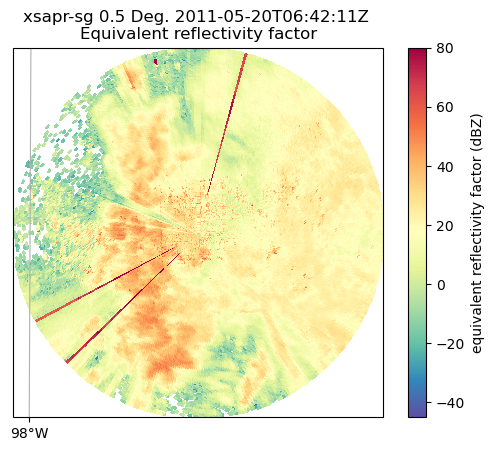

In [13]:
display.plot_ppi_map("corrected_reflectivity_horizontal")

By default, it will plot the elevation scan, the the default colormap from `Matplotlib`... let's customize!

We add the following arguements:
- `sweep=3` - The fourth elevation scan (since we are using Python indexing)
- `vmin=-20` - Minimum value for our plotted field/colorbar
- `vmax=60` - Maximum value for our plotted field/colorbar
- `projection=ccrs.PlateCarree()` - Cartopy latitude/longitude coordinate system
- `cmap='pyart_HomeyerRainbow'` - Colormap to use, selecting one provided by PyART 

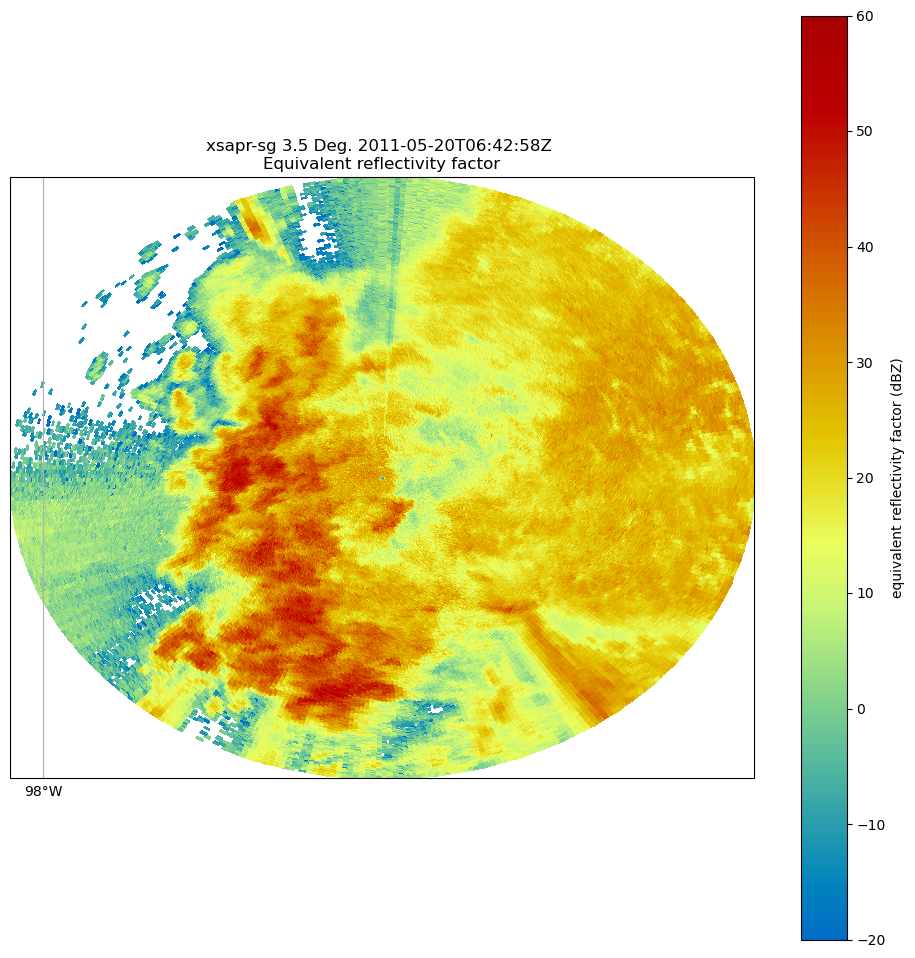

In [15]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "corrected_reflectivity_horizontal",
    sweep=3,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="HomeyerRainbow",
)
plt.show()

You can change many parameters in the graph by changing the arguments to plot_ppi_map. As you can recall from earlier. simply view these arguments in a Jupyter notebook by typing:

In [16]:
?display.plot_ppi_map

Signature:
display.plot_ppi_map(
    field,
    sweep=0,
    mask_tuple=None,
    vmin=None,
    vmax=None,
    cmap=None,
    norm=None,
    mask_outside=False,
    title=None,
    title_flag=True,
    colorbar_flag=True,
    colorbar_label=None,
    colorbar_orient='vertical',
    ax=None,
    fig=None,
    lat_lines=None,
    lon_lines=None,
    projection=None,
    min_lon=None,
    max_lon=None,
    min_lat=None,
    max_lat=None,
    width=None,
    height=None,
    lon_0=None,
    lat_0=None,
    resolution='110m',
    shapefile=None,
    shapefile_kwargs=None,
    edges=True,
    gatefilter=None,
    filter_transitions=True,
    embellish=True,
    add_grid_lines=True,
    raster=False,
    ticks=None,
    ticklabs=None,
    alpha=None,
    edgecolors='face',
    **kwargs,
)
Docstring:
Plot a PPI volume sweep onto a geographic map.

Parameters
----------
field : str
    Field to plot.
sweep : int, optional
    Sweep number to plot.

Other Parameters
----------------
mask_tuple 

Or, let's view a different elevation scan! To do this, change the sweep parameter in the plot_ppi_map function.

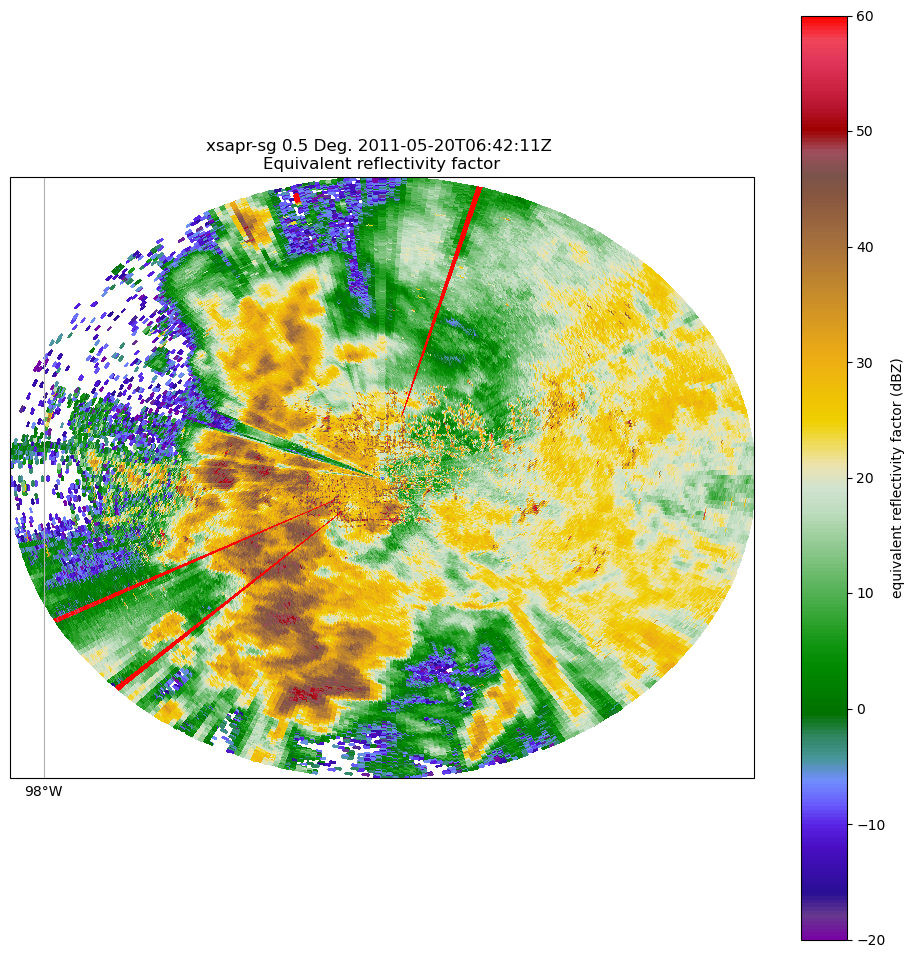

In [18]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "corrected_reflectivity_horizontal",
    sweep=0,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="Carbone42",
)
plt.show()

---

## Gridding with Py-ART
Gridding is an important workflow to understand when working with radar data! Here, we walk through the steps required.

### Antenna vs. Cartesian Coordinates

Radar data, by default, is stored in a **polar (or antenna) coordinate system**, with the data coordinates stored as an angle (ranging from 0 to 360 degrees with 0 == North), and a radius from the radar, and an elevation which is the angle between the ground and the ground.

This format can be challenging to plot, since it is scan/radar specific. Also, it can make comparing with model data, which is on a lat/lon grid, challenging since one would need to **transform** the model daa cartesian coordinates to polar/antenna coordiantes.

Fortunately, PyART has a variety of gridding routines, which can be used to **grid your data to a Cartesian grid**. Once it is in this new grid, one can easily slice/dice the dataset, and compare to other data sources.

### Why is Gridding Important?

Gridding is essential to combining multiple data sources (ex. multiple radars), and comparing to other data sources (ex. model data). There are also decisions that are made during the gridding process that have a large impact on the regridded data - for example:
- What resolution should my grid be?
- Which interpolation routine should I use?
- How smooth should my interpolated data be?

While there is not always a right or wrong answer, it is important to understand the options available, and document which routine you used with your data! Also - experiment with different options and choose the best for your use case!

### The Grid Object
We can **transform our data** into this grid object, from the radars, using `pyart.map.grid_from_radars()`.

Beforing gridding our data, we need to make a decision about the desired grid resolution and extent. For example, one might imagine a grid configuration of:
- Grid extent/limits
    - 20 km in the x-direction (north/south)
    - 20 km in the y-direction (west/east)
    - 15 km in the z-direction (vertical)
- 500 m spatial resolution

The `pyart.map.grid_from_radars()` function takes the grid shape and grid limits as input, with the order `(z, y, x)`.

Let's setup our configuration, setting our grid extent **first**, with the distance measured in **meters**

In [20]:
z_grid_limits = (500.,15_000.)
y_grid_limits = (-20_000.,20_000.)
x_grid_limits = (-20_000.,20_000.)

Now that we have our grid limits, we can set our desired resolution (again, in meters)

In [21]:
grid_resolution = 500

Let's compute our grid shape - using the extent and resolution to compute the number of grid points in each direction.

In [22]:
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

Now that we have a helper function to compute this, let's apply it to our vertical dimension

In [23]:
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
z_grid_points

29

We can apply this to the horizontal (x, y) dimensions as well.

In [24]:
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)

print(z_grid_points,
      y_grid_points,
      x_grid_points)

29 80 80


#### Use our configuration to grid the data!
Now that we have the grid shape and grid limits, let's grid up our radar!

In [27]:
grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                 )
grid

### Plot the Grid Object

#### Plot a horizontal view of the data
We can use the `GridMapDisplay` from `pyart.graph` to visualize our regridded data, starting with a horizontal view (slice along a single vertical level)

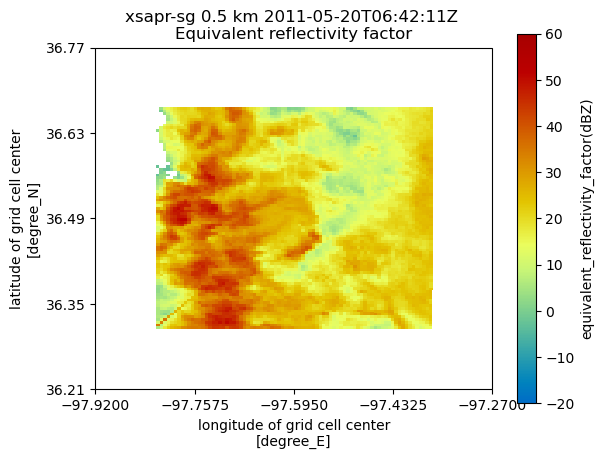

In [29]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('corrected_reflectivity_horizontal',
                  level=0,
                  vmin=-20,
                  vmax=60,
                  cmap='HomeyerRainbow')

#### Plot a Latitudinal Slice

We can also slice through a single latitude or longitude!

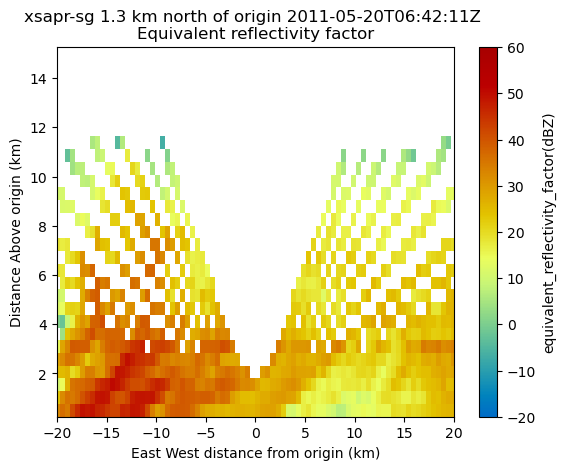

In [30]:
display.plot_latitude_slice('corrected_reflectivity_horizontal',
                            lat=36.5,
                            vmin=-20,
                            vmax=60,
                            cmap='HomeyerRainbow')
plt.xlim([-20, 20]);

#### Plot with Xarray

Another neat feature of the `Grid` object is that we can transform it to an `xarray.Dataset`!

In [31]:
ds = grid.to_xarray()
ds

<xarray.Dataset> Size: 10MB
Dimensions:                            (time: 1, z: 29, y: 80, x: 80, nradar: 1)
Coordinates: (12/16)
  * time                               (time) object 8B 2011-05-20 06:42:11.0...
  * z                                  (z) float64 232B 500.0 ... 1.5e+04
    lat                                (y, x) float64 51kB 36.31 36.31 ... 36.67
    lon                                (y, x) float64 51kB -97.82 ... -97.37
  * y                                  (y) float64 640B -2e+04 ... 2e+04
  * x                                  (x) float64 640B -2e+04 ... 2e+04
    ...                                 ...
    origin_altitude                    (time) float64 8B 214.0
    radar_altitude                     (nradar) float64 8B 214.0
    radar_latitude                     (nradar) float64 8B 36.49
    radar_longitude                    (nradar) float64 8B -97.59
    radar_time                         (nradar) float64 8B 0.03944
    radar_name                         (nradar) <U8 32B 'xsapr-sg'
Dimensions without coordinates: nradar
Data variables: (12/14)
    mean_doppler_velocity              (time, z, y, x) float32 742kB -11.9 .....
    dp_phase_shift                     (time, z, y, x) float32 742kB nan ... nan
    proc_dp_phase_shift                (time, z, y, x) float32 742kB 76.14 .....
    recalculated_diff_phase            (time, z, y, x) float32 742kB 0.3367 ....
    copol_coeff                        (time, z, y, x) float32 742kB nan ... nan
    norm_coherent_power                (time, z, y, x) float32 742kB 0.2084 ....
    ...                                 ...
    reflectivity_horizontal            (time, z, y, x) float32 742kB -4.818 ....
    corrected_reflectivity_horizontal  (time, z, y, x) float32 742kB 5.636 .....
    unf_dp_phase_shift                 (time, z, y, x) float32 742kB 76.14 .....
    specific_attenuation               (time, z, y, x) float32 742kB 0.002551...
    diff_reflectivity                  (time, z, y, x) float32 742kB 0.0 ... nan
    ROI                                (time, z, y, x) float32 742kB 493.8 .....
Attributes:
    radar_name:          xsapr-sg
    nradar:              1
    instrument_name:     xsapr-sg
    platform_is_mobile:  False
    history:             created by user scollis on evs346820 at 13-Nov-2012,...

Now, our plotting routine is a **one-liner**, starting with the horizontal slice:

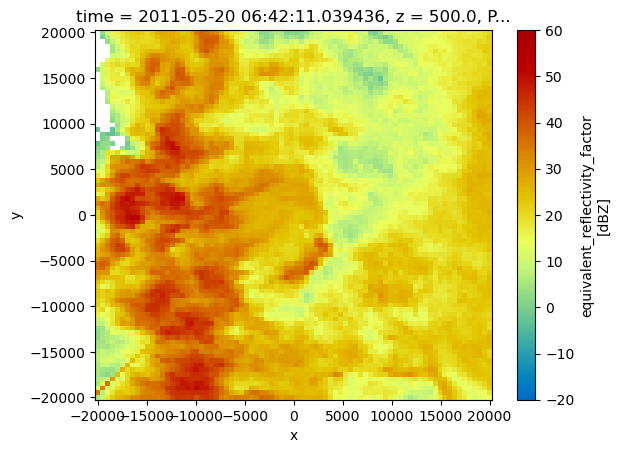

In [32]:
ds.isel(z=0).corrected_reflectivity_horizontal.plot(cmap='HomeyerRainbow',
                                                    vmin=-20,
                                                    vmax=60);

And a vertical slice at a given y dimension (latitude)

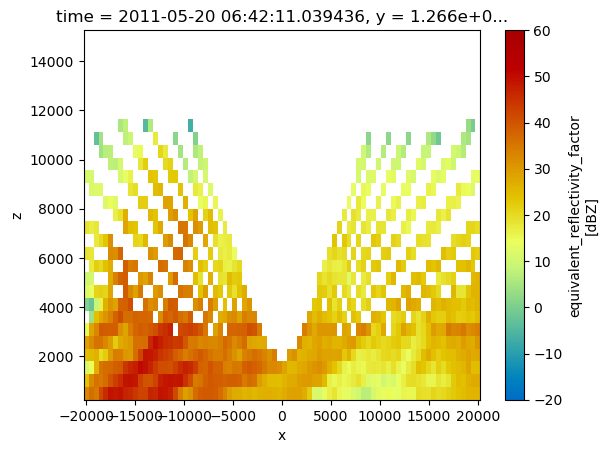

In [33]:
ds.sel(y=1300,
       method='nearest').corrected_reflectivity_horizontal.plot(cmap='HomeyerRainbow',
                                                                vmin=-20,
                                                                vmax=60);

---
## Summary
Within this notebook, we covered the basics of working with radar data using `pyart`, including:
- Reading in a file using `xradar.io`
- Investigating the `xradar` object
- Visualizing radar data using the `RadarMapDisplay`
- Gridding with Py-ART
- Visualizing gridded output

### What's Next
In the next few notebooks, we walk through applying data cleaning methods, and advanced visualization methods!

## Resources and References
Py-ART essentials links:

* [Landing page](https://arm-doe.github.io/pyart/)
* [Examples](https://arm-doe.github.io/pyart/examples/index.html)
* [Source Code](https://github.com/ARM-DOE/pyart)
* [Mailing list](https://groups.google.com/group/pyart-users/)
* [Issue Tracker](https://github.com/ARM-DOE/pyart/issues)